In [ ]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


np.random.seed(1000)
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [ ]:
DATA_DIR = "/content/drive/My Drive/New Masks Dataset"
train = os.path.join(DATA_DIR, 'Train')
valid = os.path.join(DATA_DIR, 'Validation')
test = os.path.join(DATA_DIR, 'Test')
print(train)







/content/drive/My Drive/New Masks Dataset/Train


In [ ]:
from tensorflow import keras
from tensorflow.keras.utils import load_img
class_names=os.listdir(train)
print(class_names)

['Mask', 'Non Mask']


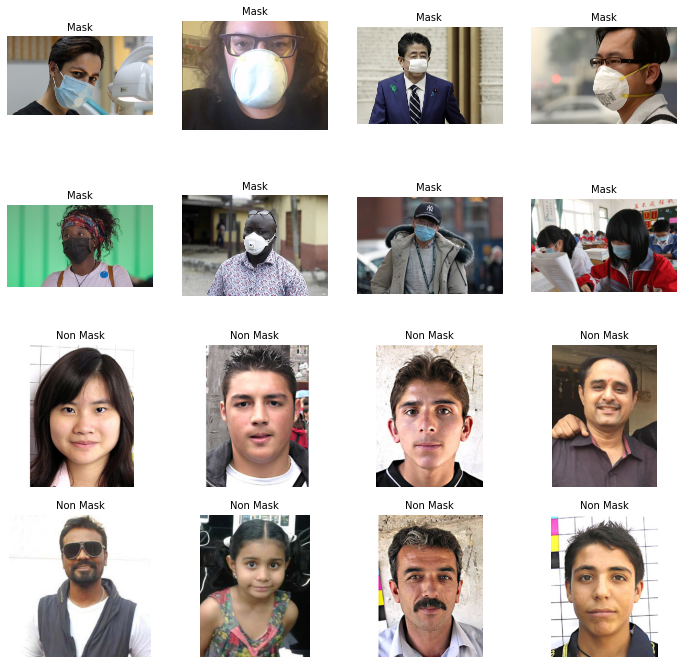

In [ ]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4

plt.figure(figsize=(12,12))

mask_path = os.path.join(train, 'Mask')
no_mask_path = os.path.join(train, 'Non Mask')

mask_pic = []
for i in os.listdir(mask_path)[0:8]:
    mask_pic.append(os.path.join(mask_path, i))
    
no_mask_pic = []
for i in os.listdir(no_mask_path)[0:8]:
    no_mask_pic.append(os.path.join(no_mask_path, i))
    
merged_list = mask_pic + no_mask_pic

for i in range(0, len(merged_list)):
    data = merged_list[i].split('/')[6]  # get the last element values
    plt.subplot(nrows, ncols, i+1)
    plt.axis('Off')
    image = mpimg.imread(merged_list[i])
    plt.title(data, fontsize=10)
    plt.imshow(image, cmap='gray')
plt.show()


In [ ]:
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen = ImageDataGenerator(rescale= 1. /255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale= 1. /255)
validation_datagen = ImageDataGenerator(rescale= 1. /255)

In [30]:
train_generator = train_datagen.flow_from_directory(train, 
                                                    target_size=(150,150),
                                                    batch_size=64,
                                                    class_mode='binary')
test_generator = test_datagen.flow_from_directory(test, 
                                                    target_size=(150,150),
                                                    batch_size=64,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(valid, 
                                                    target_size=(150,150),
                                                    batch_size=64,
                                                    class_mode='binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [31]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same',activation='relu', input_shape=(150,150, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(train_generator, 
                   epochs=20,
                   validation_data = validation_generator)

Epoch 1/20
10/10 [==============================] - 297s 31s/step - loss: 2.3123 - accuracy: 0.5617 - val_loss: 0.6747 - val_accuracy: 0.5131
Epoch 2/20
10/10 [==============================] - 36s 4s/step - loss: 0.6483 - accuracy: 0.6700 - val_loss: 0.6582 - val_accuracy: 0.7255
Epoch 3/20
10/10 [==============================] - 36s 4s/step - loss: 0.4712 - accuracy: 0.8450 - val_loss: 0.4272 - val_accuracy: 0.8627
Epoch 4/20
10/10 [==============================] - 35s 4s/step - loss: 0.3525 - accuracy: 0.8733 - val_loss: 0.3478 - val_accuracy: 0.8922
Epoch 5/20
10/10 [==============================] - 33s 3s/step - loss: 0.2913 - accuracy: 0.8933 - val_loss: 0.3259 - val_accuracy: 0.9052
Epoch 6/20
10/10 [==============================] - 34s 3s/step - loss: 0.2751 - accuracy: 0.9017 - val_loss: 0.3495 - val_accuracy: 0.9052
Epoch 7/20
10/10 [==============================] - 35s 3s/step - loss: 0.3024 - accuracy: 0.8883 - val_loss: 0.3643 - val_accuracy: 0.9085
Epoch 8/20
10/10 [

Text(0.5, 0, 'Epoch')

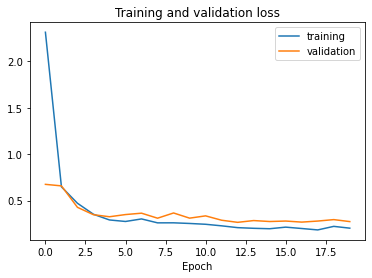

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and validation loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

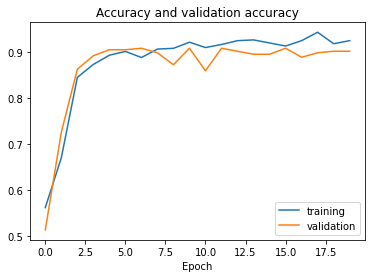

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy and validation accuracy')
plt.xlabel('Epoch')

In [36]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save('model.h5')